# Dense Email Network
Link: https://snap.stanford.edu/data/email-Eu-core.html
> Dense email network from a European research institution.

---

Focus: explore the differences between models and correctly apply the right one

In [14]:
# Imports
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, average_precision_score
import sys
sys.path.append('../')
from utils import negative_sampling as ns, splits, plot


In [15]:
# Const
dataset = "data/email-Eu-core.txt"
random.seed(42)

In [16]:
# Graph Creation
G = nx.read_edgelist(dataset, nodetype=int)

## Exploratory Data Analysis (EDA)

In [17]:
average_degree = sum(dict(G.degree).values()) / len(G.nodes)
density = nx.density(G)

print(G)
print(f'Average degree: {average_degree:.4f}')
print(f'Density: {density:.4f}')

Graph with 1005 nodes and 16706 edges
Average degree: 33.2458
Density: 0.0331


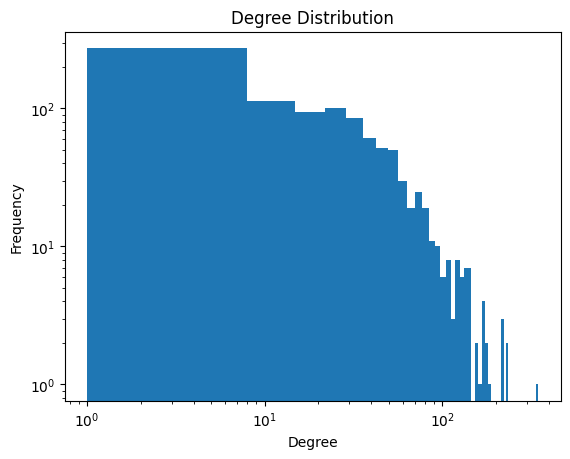

In [18]:
plot.degree_distribution_plot(G, logx=True, logy=True)
# TODO understand power-law distribution and log log scale and add to Obsidian

In [19]:
# Connected Components
print("Number of connected components:", nx.number_connected_components(G))

G_lcc = G.subgraph(max(nx.connected_components(G), key=len)).copy()
print("Largest Connected Component:", G_lcc)

Number of connected components: 20
Largest Connected Component: Graph with 986 nodes and 16687 edges


In [20]:
# Clustering
print(f'Average Local Clustering: {nx.average_clustering(G):.4f}')
print(f'Transitivity: {nx.transitivity(G):.4f}')


Average Local Clustering: 0.3994
Transitivity: 0.2674


In [21]:
# Distances
print(f'Average Shortest Path Length in the LCC: {nx.average_shortest_path_length(G_lcc):.2f}')
print('Diameter of LCC:', nx.diameter(G_lcc))

Average Shortest Path Length in the LCC: 2.59
Diameter of LCC: 7


In [22]:
# Assortativity
print(f'Degree Assortativity of LCC: {nx.degree_assortativity_coefficient(G_lcc):.2f}')
# TODO add assortativity under degree in obsidian

Degree Assortativity of LCC: -0.01
